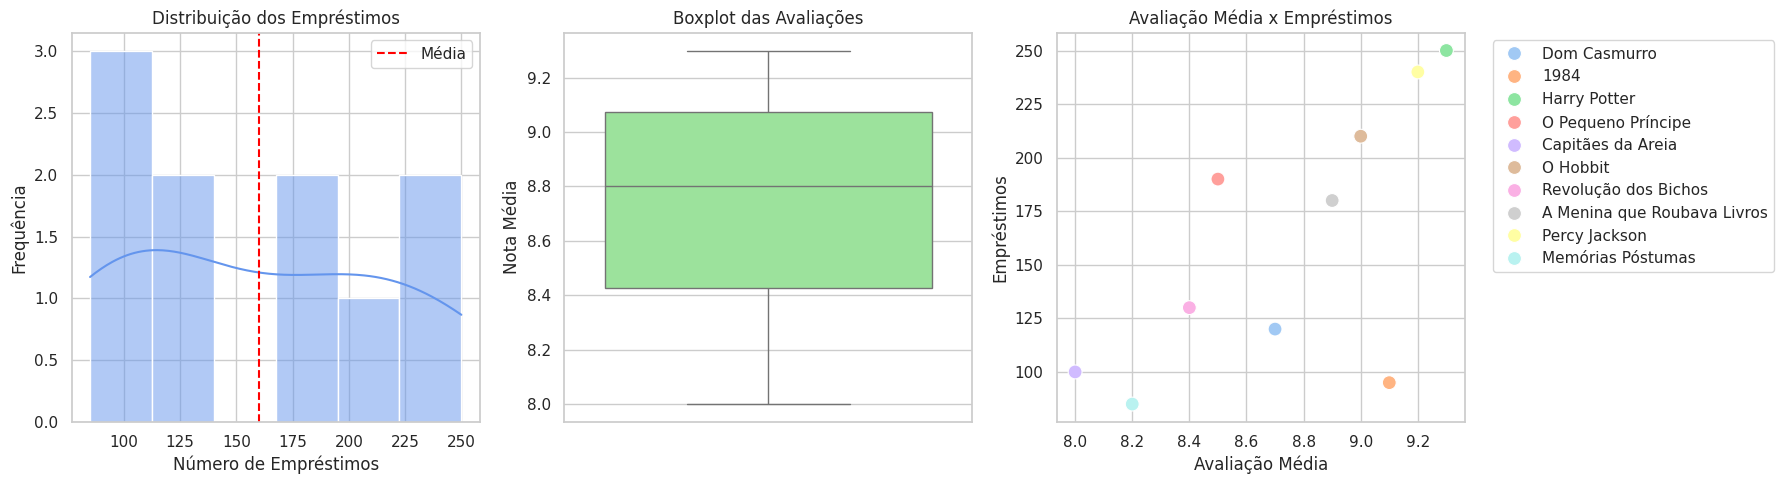

(       emprestimos  avaliacao_media  exemplares_disponiveis
 count        10.00            10.00                   10.00
 mean        160.00             8.73                    4.60
 std          61.69             0.44                    1.58
 min          85.00             8.00                    2.00
 25%         105.00             8.43                    3.25
 50%         155.00             8.80                    5.00
 75%         205.00             9.07                    5.75
 max         250.00             9.30                    7.00,
 (np.float64(160.0), 61.68918507773916, np.float64(38.555740673586975)),
 (np.float64(8.73), 0.442342250600897, np.float64(5.066921541820125)),
 {'emprestimos': (np.float64(0.9099851420606244),
   np.float64(0.2808889784180503),
   'normal'),
  'avaliacao_media': (np.float64(0.9512208810860467),
   np.float64(0.6829593657954129),
   'normal')})

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid", palette="pastel")

# Dados da biblioteca
dados = {
    'livro': [
        'Dom Casmurro', '1984', 'Harry Potter', 'O Pequeno Príncipe',
        'Capitães da Areia', 'O Hobbit', 'Revolução dos Bichos',
        'A Menina que Roubava Livros', 'Percy Jackson', 'Memórias Póstumas'
    ],
    'emprestimos': [120, 95, 250, 190, 100, 210, 130, 180, 240, 85],
    'avaliacao_media': [8.7, 9.1, 9.3, 8.5, 8.0, 9.0, 8.4, 8.9, 9.2, 8.2],
    'exemplares_disponiveis': [5, 3, 7, 6, 4, 5, 2, 6, 5, 3]
}

df = pd.DataFrame(dados)

def dispersao(coluna):
    media = df[coluna].mean()
    std = df[coluna].std()
    cv = (std / media) * 100
    return media, std, cv

media_emp, std_emp, cv_emp = dispersao('emprestimos')
media_av, std_av, cv_av = dispersao('avaliacao_media')

# Criando figura com os gráficos
fig, axs = plt.subplots(1, 3, figsize=(18,5))

# Histograma - Empréstimos
sns.histplot(df['emprestimos'], bins=6, kde=True, color='cornflowerblue', ax=axs[0])
axs[0].axvline(df['emprestimos'].mean(), color='red', linestyle='--', label='Média')
axs[0].set_title('Distribuição dos Empréstimos')
axs[0].set_xlabel('Número de Empréstimos')
axs[0].set_ylabel('Frequência')
axs[0].legend()

# Boxplot - Avaliações
sns.boxplot(y=df['avaliacao_media'], color='lightgreen', ax=axs[1])
axs[1].set_title('Boxplot das Avaliações')
axs[1].set_ylabel('Nota Média')

# Gráfico de dispersão - Avaliação vs Empréstimos
sns.scatterplot(data=df, x='avaliacao_media', y='emprestimos', hue='livro', s=100, ax=axs[2])
axs[2].set_title('Avaliação Média x Empréstimos')
axs[2].set_xlabel('Avaliação Média')
axs[2].set_ylabel('Empréstimos')
axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Testes de normalidade
teste_normalidade = {}
for coluna in ['emprestimos', 'avaliacao_media']:
    stat, p = stats.shapiro(df[coluna])
    resultado = "normal" if p > 0.05 else "não normal"
    teste_normalidade[coluna] = (stat, p, resultado)

df.describe().round(2), (media_emp, std_emp, cv_emp), (media_av, std_av, cv_av), teste_normalidade
